# Simulation Größenverhältnisse bei der Aufnahme

Annahmen: 
 * 1s Belichtungszeit GuideCam, Instantane Prozessierung (kein Delay)
 * 120s Belichtungszeit Imaging Cam
 * Ideale Nachführung, d.h. Drift und PE sind vollständig korrigiert
 * Durchmesser der Kreise: 0.5", entsprechend dem Beugungsscheibchen einer 8" Optik 

N = Anzahl Schritte während einer Aufnahme = BLZ Imaging Cam / BLZ Guide Cam

Jedes Bild bestimmt die Sternposition mit einer Unsicherheit gegeben durch Normalverteilung mit µ = 0 und σ, wobei σ dem RMS (root-mean-square) Wert entspricht.

Startpunkt = (0,0)
Skala in x und y: 1" pro Einheit


In [4]:
import numpy as np
import matplotlib.pyplot as plt

N = 120
sigma = 0.5 # rms

schritte = np.random.normal(0., sigma, size=(N,2))

xy = np.zeros((1,2))
xy = np.append(xy, schritte, axis=0)

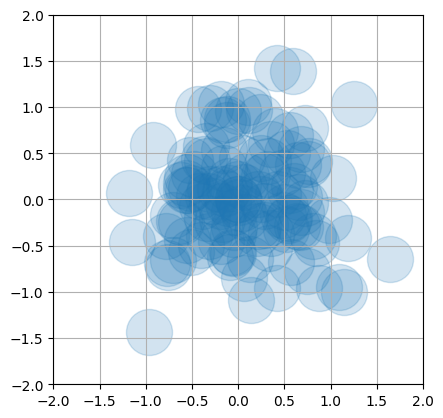

In [5]:
plt.scatter(xy[:,0], xy[:,1], s=1100, alpha=0.2)
plt.xlim(-4*sigma,4*sigma)
plt.ylim(-4*sigma,4*sigma)
plt.gca().set_aspect('equal')
plt.grid(True)
plt.savefig("Contrib_Randomness.png")
plt.show()

In [125]:
rms_x = np.sqrt(np.mean(np.square(xy[:,0])))
rms_x

0.48877701500612636

In [126]:
rms_y = np.sqrt(np.mean(np.square(xy[:,1])))
rms_y

0.6242164693581321

# Berücksichtigung von Drift & Periodic Error

Gemessen bei einem PA-Fehler von 1.9':
 * x: +0.15 px/min
 * y: -0.13 px/min

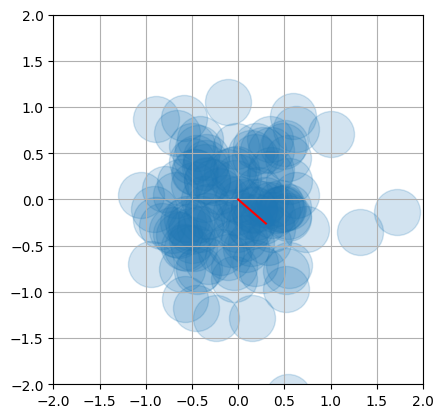

In [3]:
drift = np.array([[0,0],[0.15*2.,-0.13*2]])

plt.scatter(xy[:,0], xy[:,1], s=1100, alpha=0.2)
plt.plot(drift[:,0], drift[:,1], "r-")
plt.xlim(-4*sigma,4*sigma)
plt.ylim(-4*sigma,4*sigma)
plt.grid(True)
plt.gca().set_aspect('equal')
plt.savefig("Contrib_Drift.png")
plt.show()



# Periodic Error contribution

When periodic error in RA is given by 

$$
  \text{PE}(t) = A \sin \left( \frac{2 \pi t}{T_0} \right)
$$

with $A$ the amplitude and $T_0$ the period of the periodic error, then the maximum contribution / time is given through the derivative of this (at time zero):

$$
  \text{PE}'(t) = A \cos \left(\frac{2 \pi t}{T_0} \right) \frac{2 \pi}{T_0}
$$

in units of arcsec / seconds

In [131]:
import math  

max_PE = 2.2 * 2 * math.pi / 480

max_PE

0.02879793265790644

arcsec / second

D.h. das ist über 120 s = 1/4 einer Wurmperiode (480s = 8min) nicht mehr vernachlässigbar:

In [132]:
max_PE * 120

3.455751918948773

arcsec